### Leandro Coimbra Phase 2 - CIS 9590


#### References:
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243
https://seaborn.pydata.org/tutorial/color_palettes.html

In [7]:
# starter code import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter


In [10]:
df = pd.read_csv('/Users/leandro/Desktop/NYPD_Complaint_Data_Current__Year_To_Date_.csv')
df.head()# Reading first columns of the data to understand it

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,903695881,69,NaN,12/17/2021,22:13:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/17/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1011203,174515,40.645647,-73.902876,"(40.64564719600002, -73.90287588699994)",POINT (-73.90287588699994 40.64564719600002)
1,400462399,113,NaN,12/17/2021,06:21:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/17/2021,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,F,1043252,187998,40.682499,-73.787269,"(40.682499421000045, -73.78726915499993)",POINT (-73.78726915499993 40.682499421000045)
2,587910690,113,NaN,12/13/2021,20:05:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/13/2021,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,M,1042087,190443,40.689218,-73.791449,"(40.689218058000044, -73.79144856999993)",POINT (-73.79144856999993 40.689218058000044)
3,186105368,52,BRONX,12/07/2021,22:49:00,NaN,NaN,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,118,FELONY,NaN,DANGEROUS WEAPONS,NaN,PATROL BORO BRONX,792.0,WEAPONS POSSESSION 1 & 2,STREET,12/07/2021,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,1017088,260895,40.882718,-73.881247,"(40.88271780700006, -73.88124724999993)",POINT (-73.88124724999993 40.88271780700006)
4,185325394,113,NaN,12/06/2021,17:25:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/06/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1046176,193100,40.696483,-73.776680,"(40.69648322200004, -73.77667979199998)",POINT (-73.77667979199998 40.69648322200004)


In [11]:
# Checking number of rows and columns
shape=df.shape
print("No. of columns: " + str(shape[1]))
print("No. of rows: " +str(shape[0]))

No. of columns: 36
No. of rows: 449506


In [12]:
#All information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449506 entries, 0 to 449505
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                449506 non-null  int64  
 1   ADDR_PCT_CD               449506 non-null  int64  
 2   BORO_NM                   448355 non-null  object 
 3   CMPLNT_FR_DT              449506 non-null  object 
 4   CMPLNT_FR_TM              449506 non-null  object 
 5   CMPLNT_TO_DT              409416 non-null  object 
 6   CMPLNT_TO_TM              409568 non-null  object 
 7   CRM_ATPT_CPTD_CD          449345 non-null  object 
 8   HADEVELOPT                1577 non-null    object 
 9   HOUSING_PSA               32583 non-null   float64
 10  JURISDICTION_CODE         449023 non-null  float64
 11  JURIS_DESC                449506 non-null  object 
 12  KY_CD                     449506 non-null  int64  
 13  LAW_CAT_CD                449506 non-null  o

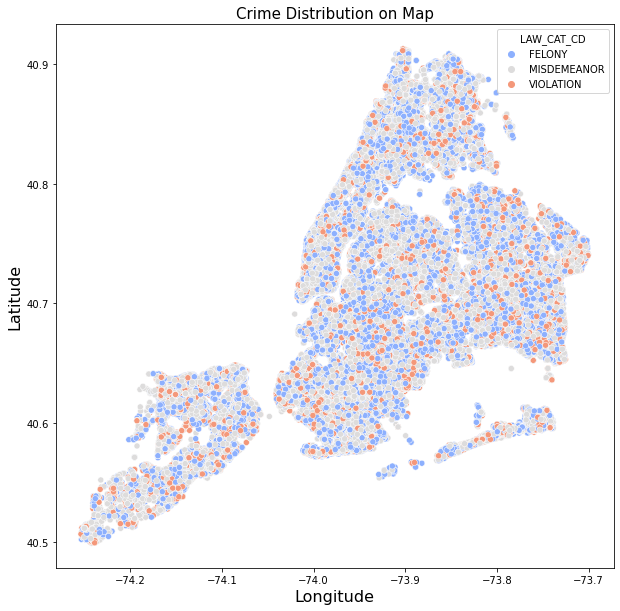

In [14]:
#Heat map of Felony, Misdemeanor and Violations
f,ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x=df.Longitude,y=df.Latitude,hue=df.LAW_CAT_CD,palette="coolwarm")
ax.set_xlabel('Longitude',fontsize='16')
ax.set_ylabel('Latitude', fontsize='16')
plt.title('Crime Distribution on Map',fontsize='15')
plt.show()

<AxesSubplot:title={'center':'Victims of Crimes per Borough'}, ylabel='BORO_NM'>

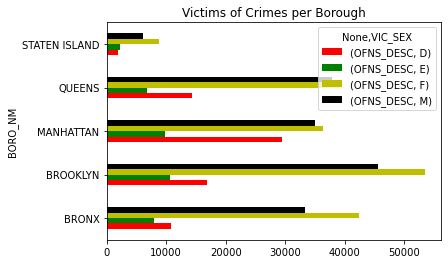

In [15]:
#What type of victmis suffer those crimes?
crime_type=pd.pivot_table(df[['OFNS_DESC','BORO_NM','VIC_SEX']],index=['BORO_NM'],columns='VIC_SEX',aggfunc=len)#.reset_index().rename(columns={'M': 'Male', 'F': 'Female','D': 'Business', 'E':'PSNY'})
#print(crime_type)

crime_type.plot(kind='barh',color=('r', 'g', 'y', 'k'),title = "Victims of Crimes per Borough")
#'E' PSNY = People of the State of 